### Import libraries.

In [164]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler

from sklearn.preprocessing import StandardScaler

### Read the dataset into a dataframe object.
#### Using the pickled data from earlier, which preserved the time series indexing.

In [165]:
df = pickle.load(open("../datasets/occupancy.p", "rb"))
# df = pickle.load(open("../datasets/train.p", "rb"))
# df = pickle.load(open("../datasets/test.p", "rb"))
# df = pickle.load(open("../datasets/test2.p", "rb"))

### Peek at the data.

In [166]:
df.head()

,temperature,humidity,light,co2,humidity_ratio,occupancy,weekday
date,,,,,,,
2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1,1
2015-02-02 14:20:00,23.7180,26.290,578.400000,760.400000,0.004773,1,1
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1,1
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1,1
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1,1


In [167]:
df.tail()

,temperature,humidity,light,co2,humidity_ratio,occupancy,weekday
date,,,,,,,
2015-02-18 09:15:00,20.815,27.7175,429.75,1505.25,0.004213,1,1
2015-02-18 09:16:00,20.865,27.7450,423.50,1514.50,0.004230,1,1
2015-02-18 09:17:00,20.890,27.7450,423.50,1521.50,0.004237,1,1
2015-02-18 09:18:00,20.890,28.0225,418.75,1632.00,0.004279,1,1
2015-02-18 09:19:00,21.000,28.1000,409.00,1864.00,0.004321,1,1


### Data dictionary.

|Feature Name|Feature Description|Units of Measurement|
|---|---|---|
|date|time the observation was recorded|year-month-day hour:minute:second|
|temperature|temperature recorded|Celsius|
|humidity|relative humidity recorded|%|
|light|light recorded at time of observation|Lux|
|co2|CO2 measured at the time of observation|ppm, parts per million|
|humidity_ration|derived quantity from temperature and relative humidity|kgwater-vapor/kg-air|
|occupancy|status of room occupancy|0 for not occupied, 1 for occupied status|
|weekday|indicates if the timestamp is weekday or weekend| 1 for weekday, 0 for weekend|

### Generate descriptive statistics and visualize.

In [233]:
title_fontname = 'Palatino'
title_fontsize = 16
label_fontsize = 14
title_pad = 20
title_color = 'navy'
label_color = 'navy'

In [168]:
describe = df.describe()
describe.drop('count', inplace=True)
describe

,temperature,humidity,light,co2,humidity_ratio,occupancy,weekday
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031,0.719844
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503,0.449086
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000,1.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000,1.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000,1.000000


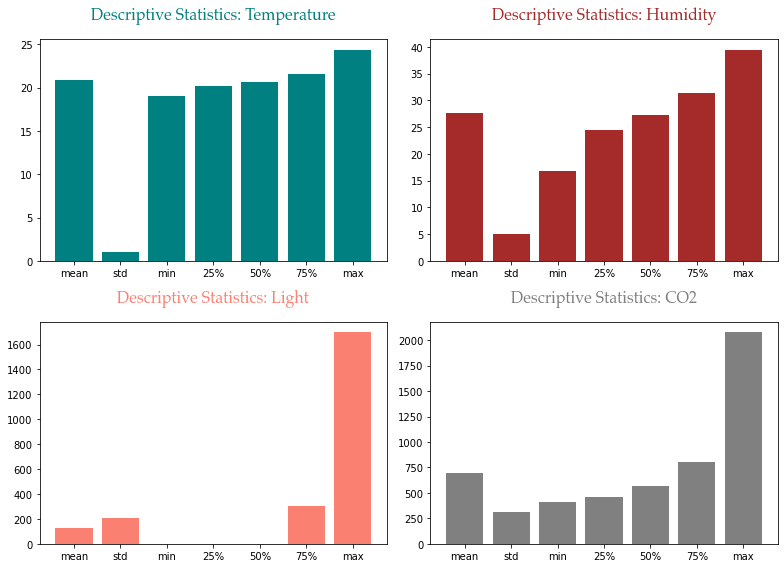

In [169]:
x = describe.index
y = describe.columns
colors = ['teal', 'brown', 'salmon', 'gray']
titles = ['Temperature', 'Humidity', 'Light', 'CO2']

f, a = plt.subplots(2,2)
a = a.ravel()

f.set_figheight(8)
f.set_figwidth(11)

for idx, ax in enumerate(a):
    if idx < 5:
        ax.bar(x, describe[y[idx]], color=colors[idx])    
        ax.set_title('Descriptive Statistics: '+titles[idx], fontsize=16, color=colors[idx], pad=20, fontname='Palatino')
    
plt.tight_layout()
f.savefig('../images/fig1.jpg', dpi=200)

plt.show()

*Temperature has a uniform distribution, with most values clustered around the mean.
Humidity follows a similar distribution, perhaps slightly more skew than the Temperature variable.
The Light variable is highly skewed, and there seem to be outliers, which will be investigated during the exploratory data analysis phase.
CO2 distribution is skewed, with a max value to be investigated during the EDA phase of the project.*

### Check occupancy value counts.

In [170]:
classes = df['occupancy'].value_counts(normalize=True)
classes

0    0.768969
1    0.231031
Name: occupancy, dtype: float64

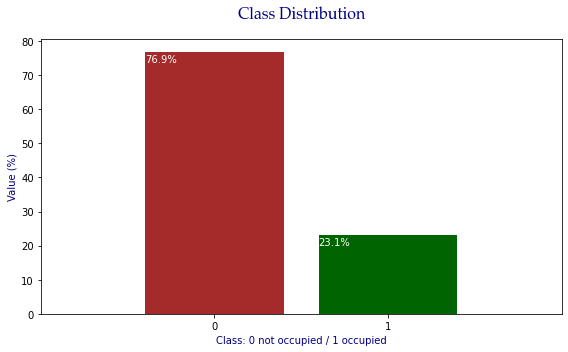

In [295]:
x = classes.index
y = [np.round(val*100, 2) for val in classes.values]

plt.figure(figsize=(8,5))
bars = plt.bar(x, y, color=['brown', 'darkgreen'])
plt.title('Class Distribution', fontsize=16, color='navy', pad=20, fontname='Palatino')
plt.xlabel('Class: 0 not occupied / 1 occupied', color='navy')
plt.xticks(rotation=0, ticks=[0, 1])
plt.xlim(-1, 2)
plt.ylabel('Value (%)', color='navy')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval-3, str(yval)+'%', color='white')
plt.tight_layout()
plt.savefig('../images/fig2.jpg', dpi=200)
plt.show()

*Here we can see the data distribution by class.
77% of the observations are for class 0, when the room is not occupied.
23% of the observations are for class 1, when the room is occupied.
This is expected as the room will be empty more often than occupied, with business hours being about 8 hours a day, and weekends being time off.*

### Histograms of each attribute.

In [172]:
df.columns

Index(['temperature', 'humidity', 'light', 'co2', 'humidity_ratio',
       'occupancy', 'weekday'],
      dtype='object')

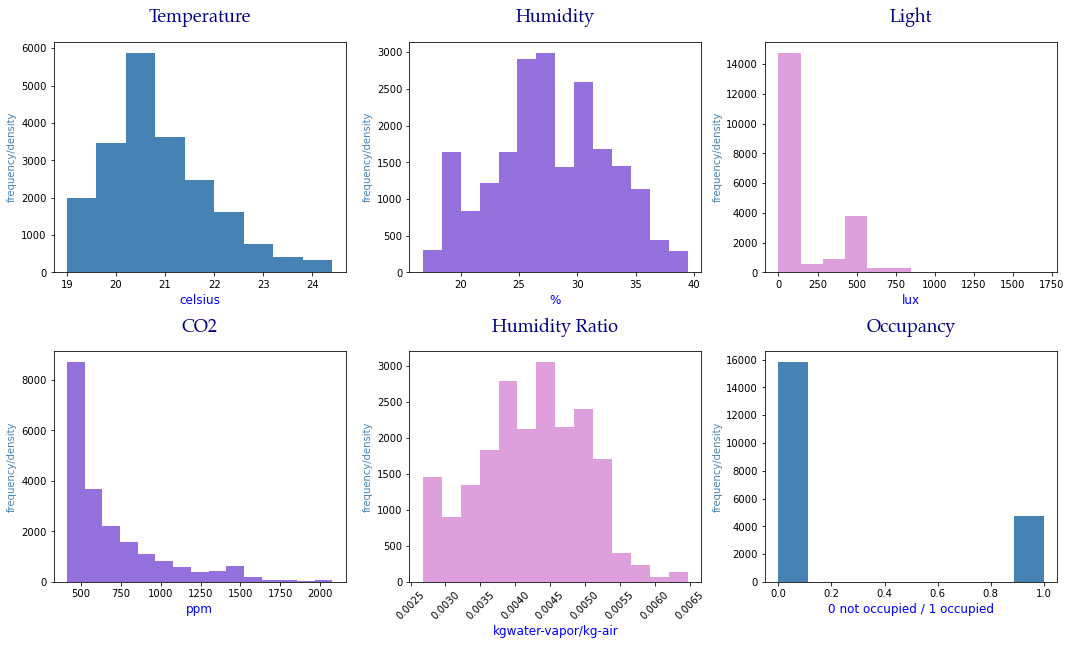

In [211]:
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html
xaxes = ['temperature', 'humidity', 'light', 'co2', 'humidity_ratio', 'occupancy']
titles = ['Temperature', 'Humidity', 'Light', 'CO2', 'Humidity Ratio', 'Occupancy']
units = ['celsius', '%', 'lux', 'ppm', 'kgwater-vapor/kg-air', '0 not occupied / 1 occupied']
colors = ['steelblue', 'mediumpurple', 'plum', 'mediumpurple', 'plum', 'steelblue']
bins = [9, 14, 12, 15, 14, 9]

f, a = plt.subplots(2,3, squeeze=False)
a = a.ravel()
f.set_figheight(9)
f.set_figwidth(15)

for idx, ax in enumerate(a):
    if idx == 4:
        ax.xaxis.set_visible(True)
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
    ax.hist(df[xaxes[idx]], bins=bins[idx], color=colors[idx])
    ax.set_title(titles[idx], fontsize=18, pad=20, fontname='Palatino', color='navy')
    ax.set_xlabel(units[idx], fontsize=12, color='blue')
    ax.set_ylabel('frequency/density', color='steelblue')
    
plt.tight_layout()
f.savefig('../images/fig3.jpg', dpi=200)
plt.show()

*Light and CO2 are highly skewed, with temperature and humidity/humidity_ratio being the closest to a uniform distribution, but still showing positive skewness on the right.*

In [174]:
# http://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/

import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code));

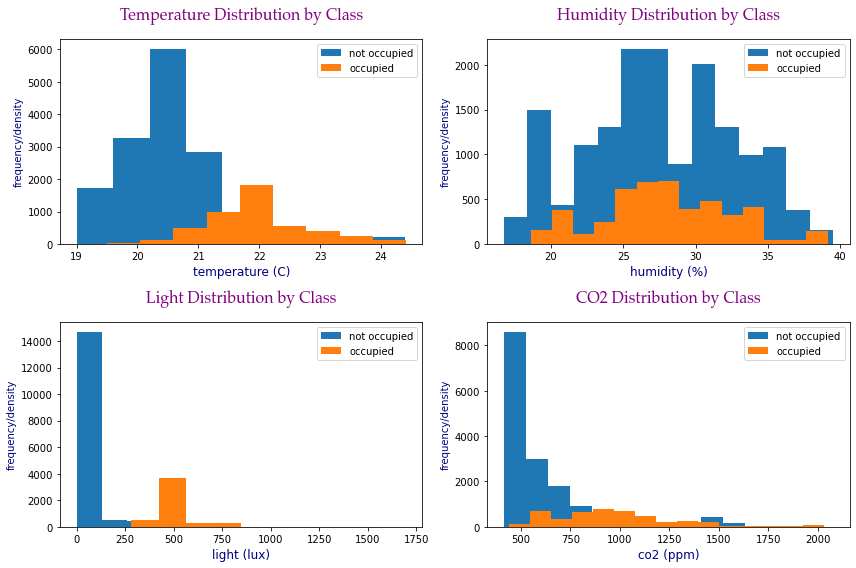

In [175]:
xaxes = ['temperature', 'humidity', 'light', 'co2']
units = ['C', '%', 'lux', 'ppm']
titles = ['Temperature', 'Humidity', 'Light', 'CO2']
bins = [9, 14, 12, 15, 14, 9]

f, a = plt.subplots(2,2, squeeze=False)
a = a.ravel()
f.set_figheight(8)
f.set_figwidth(12)
#plt.rc('axes', prop_cycle=(cycler('color', ['teal', 'salmon'])))

for idx, ax in enumerate(a):
    df.groupby('occupancy')[xaxes[idx]].hist(ax=ax, bins=bins[idx], grid=False)
    ax.set_title(titles[idx]+' Distribution by Class', fontsize=16, color='purple', pad=20, fontname='Palatino')
    ax.set_xlabel(xaxes[idx]+' ('+units[idx]+')', fontsize=12, color='navy')
    ax.set_ylabel('frequency/density', fontsize=10,  color='navy')
    ax.legend(loc=1, labels=['not occupied', 'occupied'])
    
plt.tight_layout()
f.savefig('../images/fig26.jpg', dpi=200)
plt.show()

*Light stands out as the separation between the values is very obvious. This is a good indication that light is most likely a good feature to use in the modeling phase of this project.
Temperature values are lower when the room is not occupied.
Humidity values overlap for both classes.*

### View the Distributions of Observations using KDE (Kernel Density Estimate) and Scatter plot.

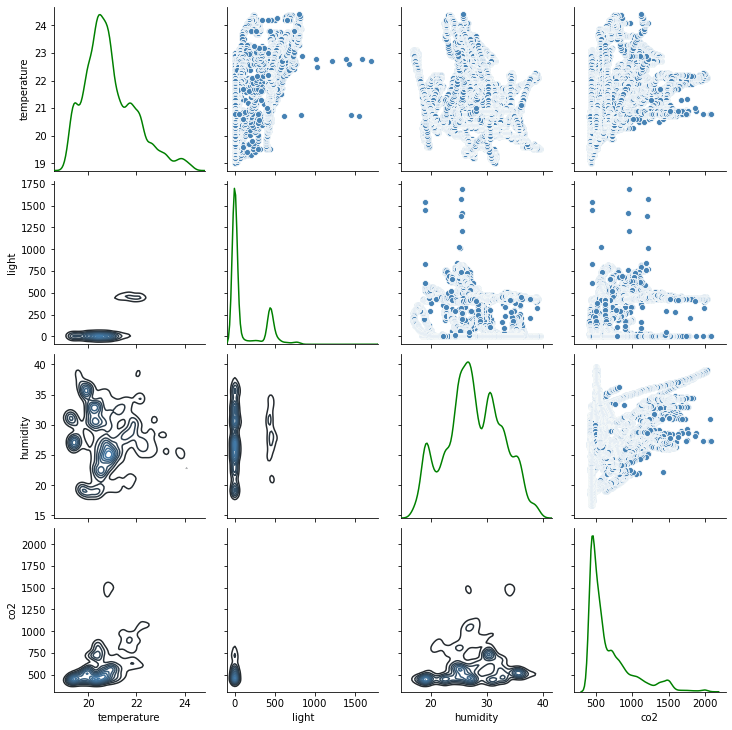

In [261]:
g = sns.PairGrid(df[['temperature', 'light', 'humidity', 'co2']], diag_sharey=False)
g.map_upper(sns.scatterplot, color='steelblue')
g.map_diag(sns.kdeplot, color='green')
g.map_lower(sns.kdeplot, color='steelblue')
g.savefig('../images/fig21.jpg', dpi=200) 
plt.show()

*In this graph, we can see the distribution for each variable, and also how it correlates to each of the other variables.
Even though we have seen some of this information in previous slides, this is a different way to view the distributions, and we also see the correlations between the measurements.
The diagonal and bottom half are KDE plots (Kernel Density Estimate). The top half is comprised of scatter plots.
A few observations:
Light is highly skewed.
We notice some outliers in the plots that involve the light and co2 variables. These are data points that may require further investigation.
For the KDE plots in the lower half, we can see most light data points are 0s. It may be worth transforming the light variable into a categorical, i.e. 0 if light is on, and 1 for light on.*

### Data distributions by class.

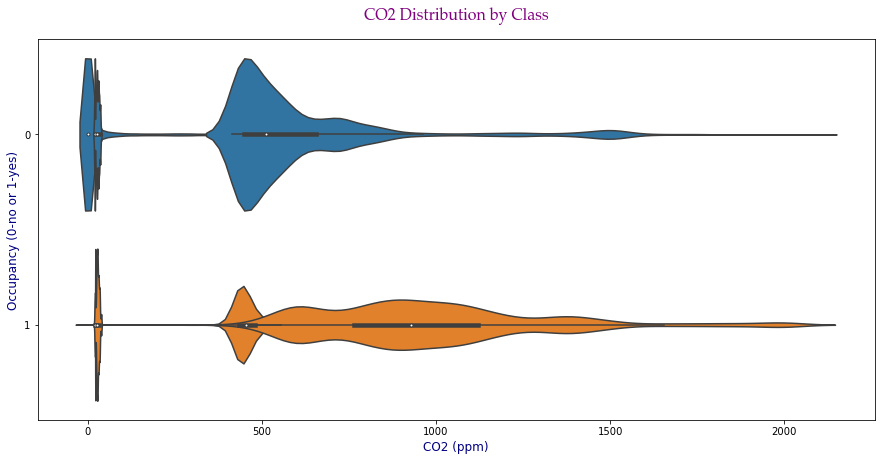

In [177]:
xs = ['temperature', 'light', 'humidity', 'co2']
titles = ['Temperature', 'Light', 'Humidity', 'CO2']
ylabels = ['Temperature (C)', 'Light (Lux)', 'Humidity (%)', 'CO2 (ppm)']

plt.rcParams['figure.figsize'] = (15, 7)

for i, x in enumerate(xs):
    boxplot = sns.violinplot(data=df, x=x, y='occupancy', orient='h')
    boxplot.set_title(titles[i]+' Distribution by Class', fontsize=16, color='purple', pad=20, fontname='Palatino')
    boxplot.set_xlabel(ylabels[i], fontsize=12, color='navy')
    boxplot.set_ylabel('Occupancy (0-no or 1-yes)', fontsize=12, color='navy')
    fig = boxplot.get_figure()
    fig.savefig('../images/violinplot'+str(i)+'.jpg')

### Line plot for each attribute over time observed.

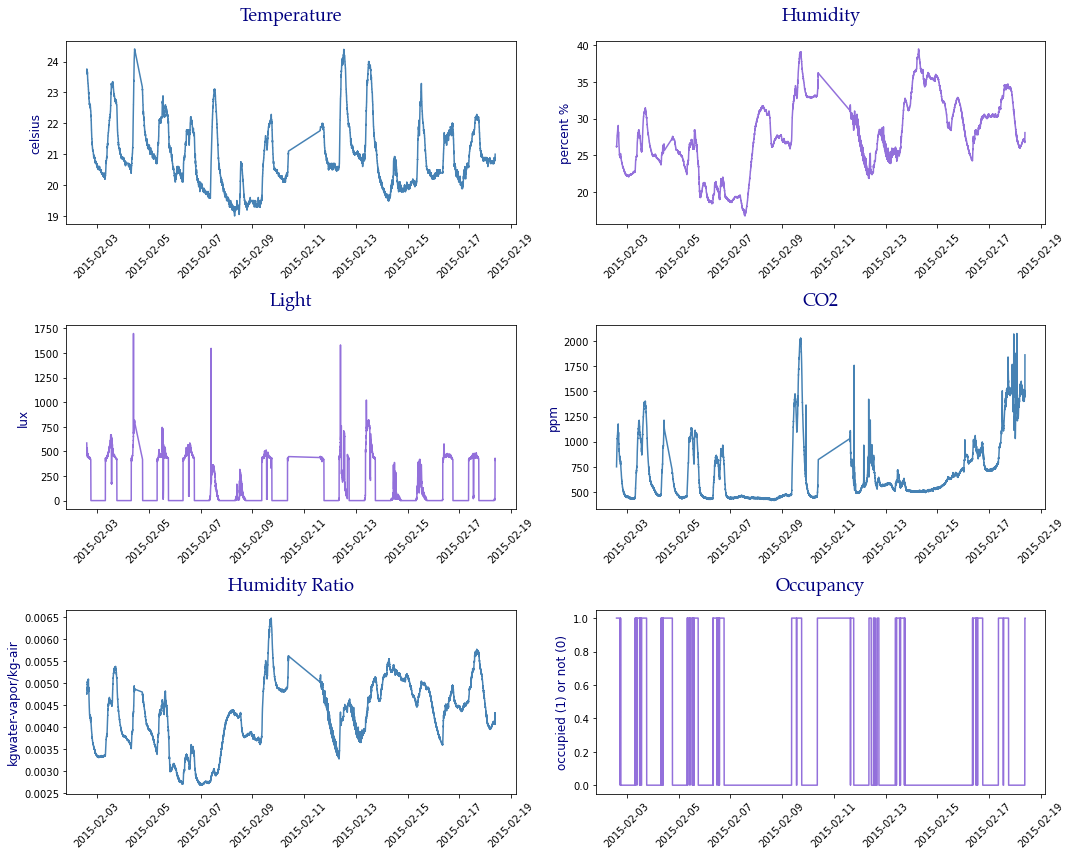

In [214]:
xaxes = ['temperature', 'humidity', 'light', 'co2', 'humidity_ratio', 'occupancy']
yaxes = ['celsius', 'percent %', 'lux', 'ppm', 'kgwater-vapor/kg-air', 'occupied (1) or not (0)']
titles = ['Temperature', 'Humidity', 'Light', 'CO2', 'Humidity Ratio', 'Occupancy']
colors = ['steelblue', 'mediumpurple', 'mediumpurple', 'steelblue', 'steelblue', 'mediumpurple']

f, a = plt.subplots(3,2, squeeze=False)
a = a.ravel()
f.set_figheight(12)
f.set_figwidth(15)

for idx, ax in enumerate(a):
    ax.xaxis.set_visible(True)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.plot(df.index, df[xaxes[idx]], color=colors[idx])
    ax.set_title(titles[idx], fontsize=18, pad=20, loc='center', color='navy', fontname='Palatino')
    #ax.set_xlabel('date', color='navy', fontsize=12)
    ax.set_ylabel(yaxes[idx], color='navy', fontsize=12)
    
plt.tight_layout()
f.savefig('../images/fig4.jpg', dpi=200)    

plt.show()

*There is data missing for 2/11, so we observe a gap in the time series.
There are some spikes in light measurement on 2/7 and 2/12 which we will review in detail later.*

### Compare average values by class.

In [184]:
occupancy_mean = df.groupby('occupancy').mean()
occupancy_mean

,temperature,humidity,light,co2,humidity_ratio,weekday
occupancy,,,,,,
0,20.584830,27.529654,25.237893,604.996614,0.004120,0.635674
1,21.975909,28.076209,481.967380,975.321870,0.004589,1.000000


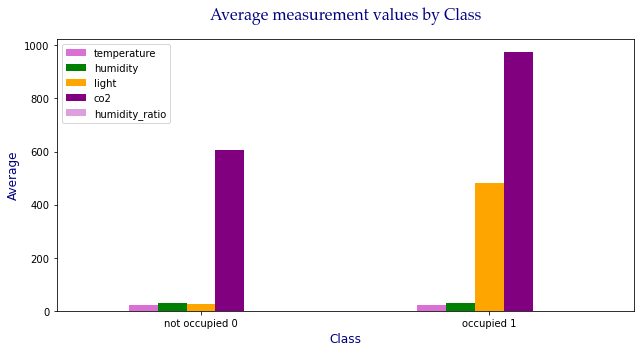

In [259]:
colors = ['orchid', 'green', 'orange', 'purple', 'plum']
occupancy_mean.drop(columns=['weekday']).plot(kind='bar', figsize=(9,5), color=colors)
plt.title('Average measurement values by Class', fontsize=16, pad=20, color='navy', fontname='Palatino')
plt.xlabel('Class', color='navy', fontsize=12)
plt.xticks(rotation=0, ticks=[0, 1], labels=['not occupied 0', 'occupied 1'])
plt.ylabel('Average', color='navy', fontsize=12)
plt.legend(loc=0)
plt.tight_layout()
plt.savefig('../images/fig9.jpg', dpi=200)
plt.show()

*Average co2 and light values are much higher when the room is occupied. This is an indication that these variables could be good features for occupancy prediction.*

### 2/04 Wed, 2/12 Thur, and 2/7 Sat are showing a spike in the light measurement. Let's zoom in...

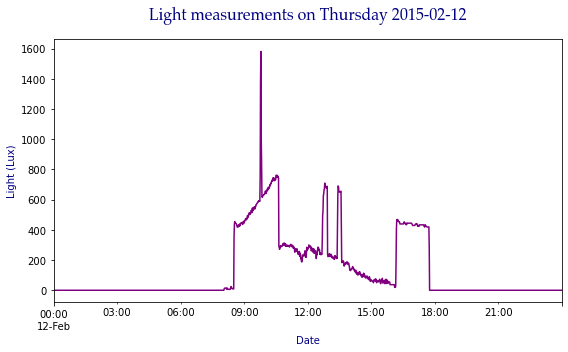

In [222]:
plt.figure(figsize=(8,5))
df['2015-02-12']['light'].plot(color='purple')
plt.title('Light measurements on Thursday 2015-02-12', fontsize=16, color='navy', pad=20, fontname='Palatino')
plt.xlabel('Date', color='navy')
plt.ylabel('Light (Lux)', color='navy')
plt.tight_layout()
plt.savefig('../images/fig10.jpg', dpi=200)
plt.show()

In [187]:
df[df['light'] == df['2015-02-12']['light'].max()]

,temperature,humidity,light,co2,humidity_ratio,occupancy,weekday
date,,,,,,,
2015-02-12 09:47:00,22.79,25.29,1581.0,1211.5,0.004338,1,1


In [188]:
df['2015-02-12 09:42:00':'2015-02-12 09:52:00']

,temperature,humidity,light,co2,humidity_ratio,occupancy,weekday
date,,,,,,,
2015-02-12 09:42:00,22.675000,25.267500,592.50,1167.500000,0.004304,1,1
2015-02-12 09:43:00,22.700000,25.290000,592.50,1166.000000,0.004314,1,1
2015-02-12 09:44:00,22.700000,25.290000,589.25,1178.500000,0.004314,1,1
2015-02-12 09:45:00,22.700000,25.290000,756.00,1195.000000,0.004314,1,1
2015-02-12 09:46:00,22.772000,25.290000,1380.00,1202.500000,0.004333,1,1
2015-02-12 09:47:00,22.790000,25.290000,1581.00,1211.500000,0.004338,1,1
2015-02-12 09:48:00,22.790000,25.100000,1010.50,1215.500000,0.004305,1,1
2015-02-12 09:49:00,22.890000,24.600000,844.00,1192.000000,0.004244,1,1
2015-02-12 09:50:00,22.865000,24.647500,621.00,1139.750000,0.004246,1,1


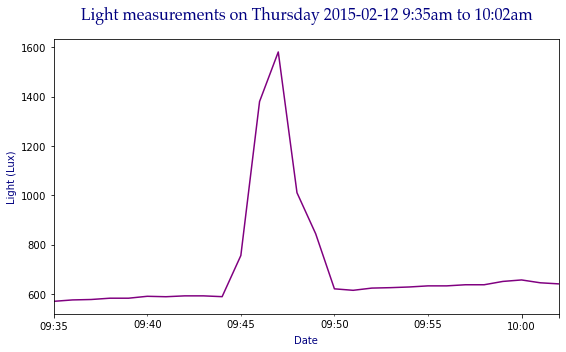

In [225]:
plt.figure(figsize=(8,5))
df['2015-02-12 09:35:00':'2015-02-12 10:02:00']['light'].plot(color='purple')
plt.title('Light measurements on Thursday 2015-02-12 9:35am to 10:02am', fontsize=16, color='navy', pad=20, fontname='Palatino')
plt.xlabel('Date', color='navy')
plt.ylabel('Light (Lux)', color='navy')
plt.tight_layout()
plt.savefig('../images/fig11.jpg', dpi=200)
plt.show()

It seems the lights are turned on around 9:45am, and we see a spike in the light intensity.  
Lux: The amount of light that is cast on a surface is called illuminance, which is measured in lux. This can be thought of as light intensity within a specific area.  
As natural light increases with the daylight, the lights are turned off.


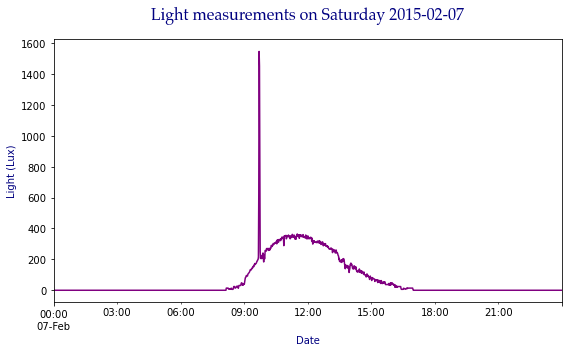

In [227]:
plt.figure(figsize=(8,5))
df['2015-02-07']['light'].plot(color='purple')
plt.title('Light measurements on Saturday 2015-02-07', fontsize=16, color='navy', pad=20, fontname='Palatino')
plt.xlabel('Date', color='navy')
plt.ylabel('Light (Lux)', color='navy')
plt.tight_layout()
plt.savefig('../images/fig12.jpg', dpi=200)
plt.show()

In [191]:
df[df['light'] == df['2015-02-07']['light'].max()]

,temperature,humidity,light,co2,humidity_ratio,occupancy,weekday
date,,,,,,,
2015-02-07 09:42:00,20.7,18.89,1546.333333,455.333333,0.002845,0,0


In [192]:
df['2015-02-07 09:35:00':'2015-02-07 09:46:00']

,temperature,humidity,light,co2,humidity_ratio,occupancy,weekday
date,,,,,,,
2015-02-07 09:35:00,20.525,19.000000,181.500000,455.000000,0.002831,0,0
2015-02-07 09:36:00,20.550,19.000000,188.500000,458.250000,0.002835,0,0
2015-02-07 09:37:00,20.600,18.972500,190.000000,457.000000,0.002840,0,0
2015-02-07 09:38:00,20.600,18.926667,196.666667,456.333333,0.002833,0,0
2015-02-07 09:39:00,20.650,18.945000,199.000000,457.500000,0.002844,0,0
2015-02-07 09:40:00,20.700,18.917500,215.000000,454.500000,0.002849,0,0
2015-02-07 09:41:00,20.700,18.890000,611.500000,452.250000,0.002845,0,0
2015-02-07 09:42:00,20.700,18.890000,1546.333333,455.333333,0.002845,0,0
2015-02-07 09:43:00,20.745,18.890000,1451.750000,453.000000,0.002853,0,0


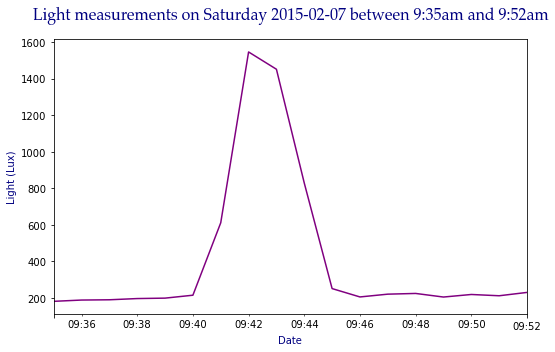

In [239]:
plt.figure(figsize=(8,5))
df['2015-02-07 09:35:00':'2015-02-07 09:52:00']['light'].plot(color='purple')
plt.title('Light measurements on Saturday 2015-02-07 between 9:35am and 9:52am', \
          fontsize=title_fontsize, color=title_color, pad=title_pad, fontname=title_fontname)
plt.xlabel('Date', color='navy')
plt.ylabel('Light (Lux)', color='navy')
plt.tight_layout()
plt.savefig('../images/fig13.jpg', dpi=200)
plt.show()

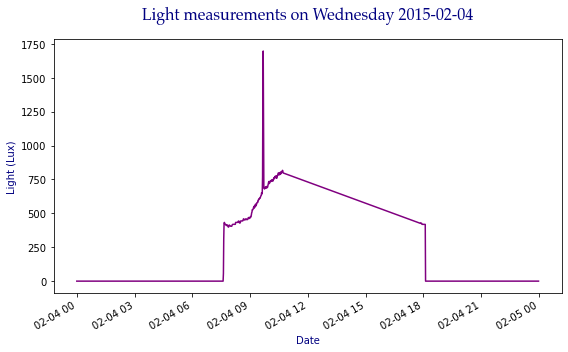

In [236]:
plt.figure(figsize=(8,5))
df['2015-02-04']['light'].plot(color='purple')
plt.title('Light measurements on Wednesday 2015-02-04', \
          fontsize=title_fontsize, color=title_color, pad=title_pad, fontname=title_fontname)
plt.xlabel('Date', color=label_color)
plt.ylabel('Light (Lux)', color=label_color)
plt.tight_layout()
plt.savefig('../images/fig27.jpg', dpi=200)
plt.show()

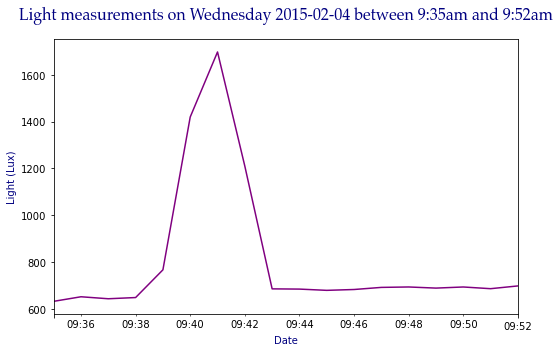

In [240]:
plt.figure(figsize=(8,5))
df['2015-02-04 09:35:00':'2015-02-04 09:52:00']['light'].plot(color='purple')
plt.title('Light measurements on Wednesday 2015-02-04 between 9:35am and 9:52am', \
          fontsize=title_fontsize, color=title_color, pad=title_pad, fontname=title_fontname)
plt.xlabel('Date', color=label_color)
plt.ylabel('Light (Lux)', color=label_color)
plt.tight_layout()
plt.savefig('../images/fig28.jpg', dpi=200)
plt.show()

### There is a spike in CO2 on 2/9 and 2/12. Let's zoom in...

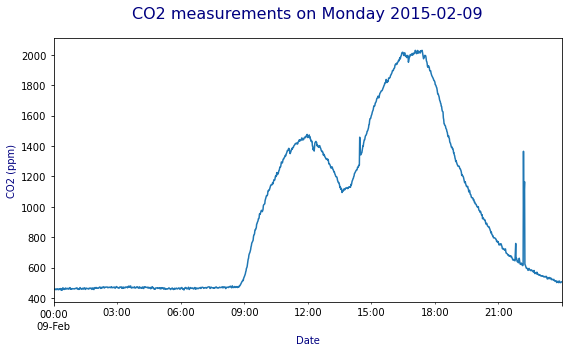

In [283]:
plt.figure(figsize=(8,5))
df['2015-02-09']['co2'].plot()
plt.title('CO2 measurements on Monday 2015-02-09', \
          fontsize=title_fontsize, color=title_color, pad=title_pad)
plt.xlabel('Date', color=label_color)
plt.ylabel('CO2 (ppm)', color=label_color)
plt.tight_layout()
plt.savefig('../images/fig29.jpg', dpi=200)
plt.show()

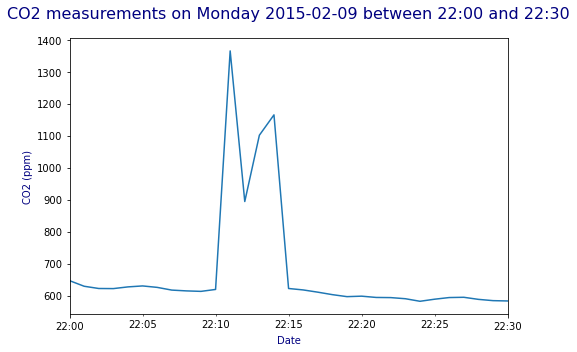

In [280]:
plt.figure(figsize=(8,5))
df['2015-02-09 22:00:00':'2015-02-09 22:30:00']['co2'].plot()
plt.title('CO2 measurements on Monday 2015-02-09 between 22:00 and 22:30', \
          fontsize=title_fontsize, color=title_color, pad=title_pad)
plt.xlabel('Date', color=label_color)
plt.ylabel('CO2 (ppm)', color=label_color)
plt.tight_layout()
plt.savefig('../images/fig30.jpg', dpi=200)
plt.show()

In [320]:
df['2015-02-09 22:10:00':'2015-02-09 22:15:00']

,temperature,humidity,light,co2,humidity_ratio,occupancy,weekday
date,,,,,,,
2015-02-09 22:10:00,20.445,33.29,0.0,619.000000,0.004952,0,1
2015-02-09 22:11:00,20.500,33.29,0.0,1365.000000,0.004969,0,1
2015-02-09 22:12:00,20.500,33.29,0.0,894.000000,0.004969,0,1
2015-02-09 22:13:00,20.500,33.29,0.0,1101.333333,0.004969,0,1
2015-02-09 22:14:00,20.500,33.29,0.0,1165.000000,0.004969,0,1
2015-02-09 22:15:00,20.500,33.29,0.0,622.000000,0.004969,0,1


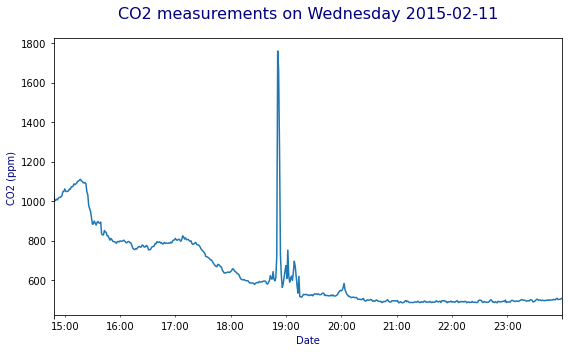

In [284]:
plt.figure(figsize=(8,5))
df['2015-02-11']['co2'].plot()
plt.title('CO2 measurements on Wednesday 2015-02-11', \
          fontsize=title_fontsize, color=title_color, pad=title_pad)
plt.xlabel('Date', color=label_color)
plt.ylabel('CO2 (ppm)', color=label_color)
plt.tight_layout()
plt.savefig('../images/fig31.jpg', dpi=200)
plt.show()

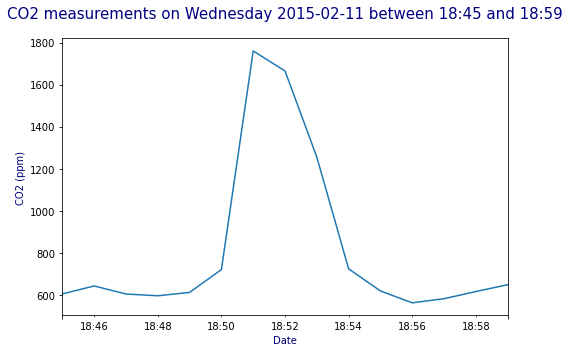

In [318]:
plt.figure(figsize=(8,5))
df['2015-02-11 18:45:00':'2015-02-11 18:59:00']['co2'].plot()
plt.title('CO2 measurements on Wednesday 2015-02-11 between 18:45 and 18:59', \
         fontsize=title_fontsize-1, color=title_color, pad=title_pad)
plt.xlabel('Date', color=label_color)
plt.ylabel('CO2 (ppm)', color=label_color)
plt.tight_layout()
plt.savefig('../images/fig32.jpg', dpi=200)
plt.show()

In [319]:
df['2015-02-11 18:50:00':'2015-02-11 18:55:00']

,temperature,humidity,light,co2,humidity_ratio,occupancy,weekday
date,,,,,,,
2015-02-11 18:50:00,21.390000,29.10,0.0,720.500000,0.004585,0,1
2015-02-11 18:51:00,21.323333,29.33,0.0,1760.000000,0.004602,0,1
2015-02-11 18:52:00,21.290000,29.00,0.0,1665.000000,0.004541,0,1
2015-02-11 18:53:00,21.290000,29.03,0.0,1255.666667,0.004546,0,1
2015-02-11 18:54:00,21.290000,29.20,0.0,724.000000,0.004572,0,1
2015-02-11 18:55:00,21.290000,29.10,0.0,619.000000,0.004557,0,1


### Comparison between 2/5-2/10 and 2/12-2/17.

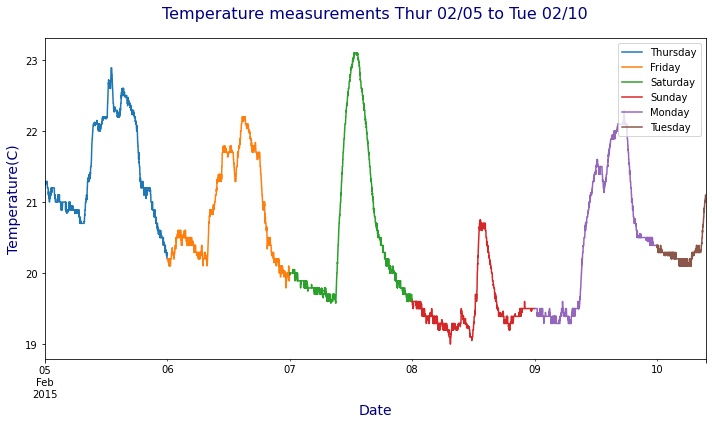

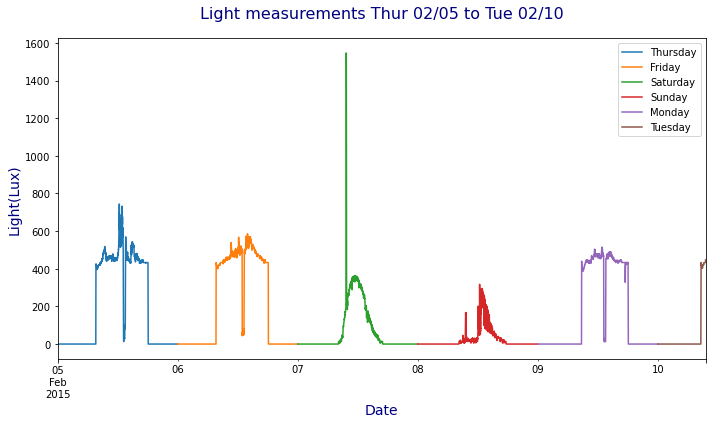

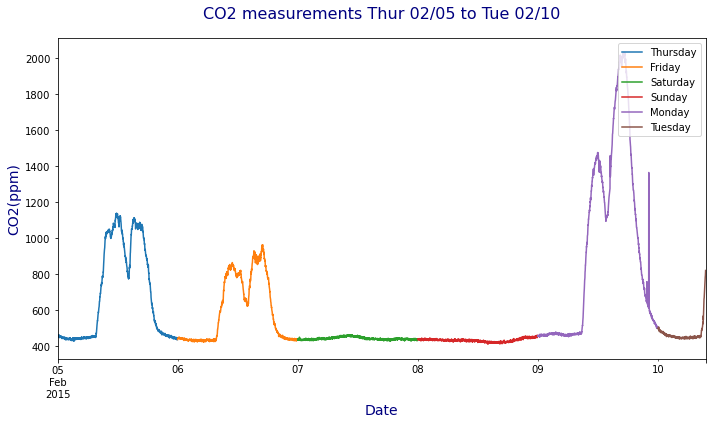

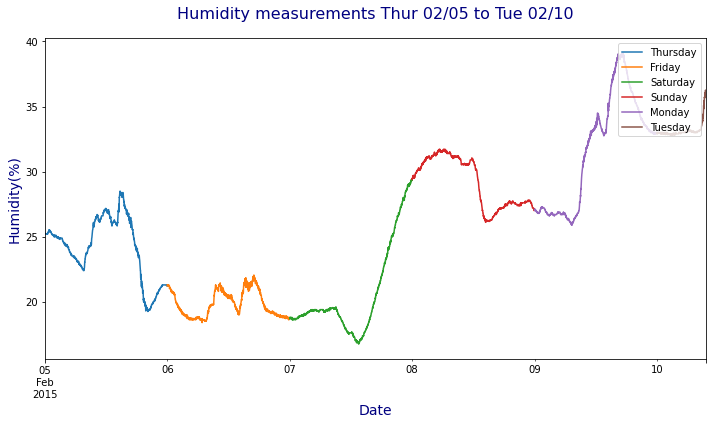

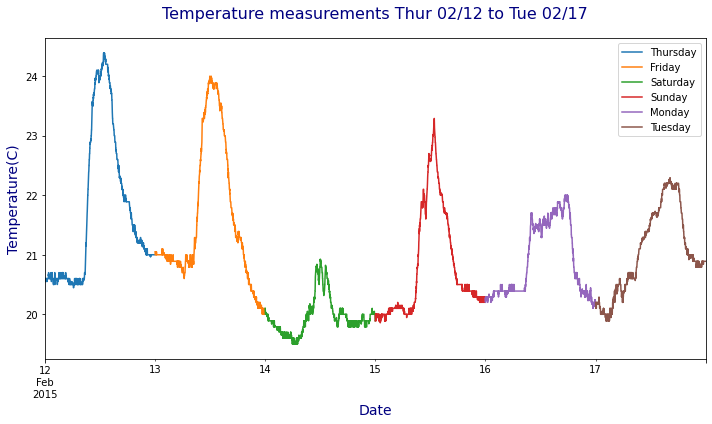

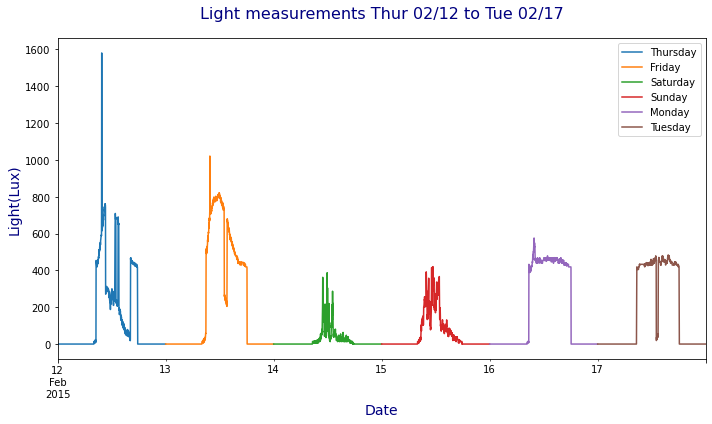

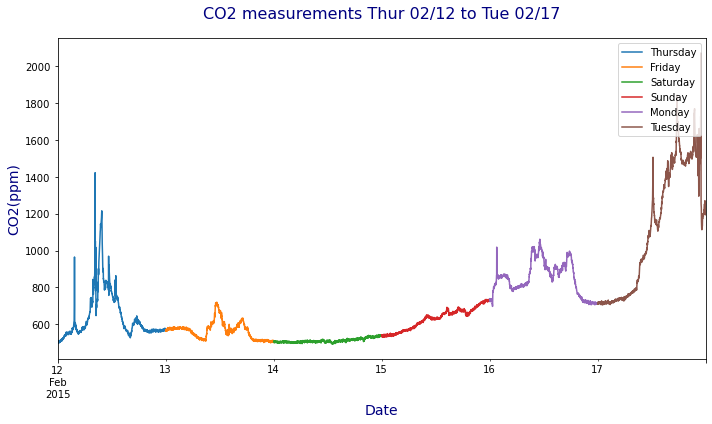

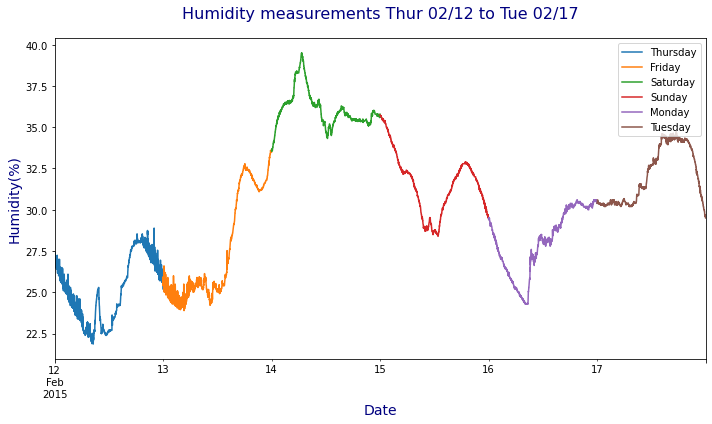

In [289]:
xs = ['temperature', 'light', 'co2', 'humidity']
title = ['Temperature', 'Light', 'CO2', 'Humidity']
unit = ['C', 'Lux', 'ppm', '%']

#dates = df.resample('D').mean().index[0:7]
for i, x in enumerate(xs):
    plt.figure(figsize=(10,6))
    #df['2015-02-04'][x].plot();
    df['2015-02-05'][x].plot();
    df['2015-02-06'][x].plot();
    df['2015-02-07'][x].plot();
    df['2015-02-08'][x].plot();
    df['2015-02-09'][x].plot();
    df['2015-02-10'][x].plot();
    plt.title(title[i] + ' measurements Thur 02/05 to Tue 02/10', \
         fontsize=title_fontsize, color=title_color, pad=title_pad)
    plt.xlabel('Date', color=label_color, fontsize=label_fontsize)
    plt.ylabel(title[i] + '(' + unit[i] + ')', color=label_color, fontsize=label_fontsize)
    labels = ['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday']
    plt.legend(labels=labels, loc=1);
    plt.tight_layout()
    plt.savefig('../images/week1_' + x + '.jpg', dpi=200)
    plt.show()
    
#dates = df.resample('D').mean().index[8:15]
for i, x in enumerate(xs):
    plt.figure(figsize=(10,6))
    df['2015-02-12'][x].plot();
    df['2015-02-13'][x].plot();
    df['2015-02-14'][x].plot();
    df['2015-02-15'][x].plot();
    df['2015-02-16'][x].plot();
    df['2015-02-17'][x].plot();
    #df['2015-02-18'][x].plot();
    plt.title(title[i] + ' measurements Thur 02/12 to Tue 02/17', \
         fontsize=title_fontsize, color=title_color, pad=title_pad)
    plt.xlabel('Date', color=label_color, fontsize=label_fontsize)
    plt.ylabel(title[i] + '(' + unit[i] + ')', color=label_color, fontsize=label_fontsize)
    #plt.xticks(dates)
    labels = ['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday']
    plt.legend(labels=labels, loc=1);
    plt.tight_layout()
    plt.savefig('../images/week2_' + x + '.jpg', dpi=200)
    plt.show()

### Scale data and plot the mean for each day, then compare attribute mean over time.
#### Notice the humidity and humidity_ratio are moving together - which makes sense, given humidity_ratio is calculated using humidity and temperature (see data dictionary). This tells us humidity and humidity_ratio are correlated, which may be useful to know later, for modeling.

In [202]:
ss = StandardScaler()
df_sc = pd.DataFrame(ss.fit_transform(df), df.index, df.columns)

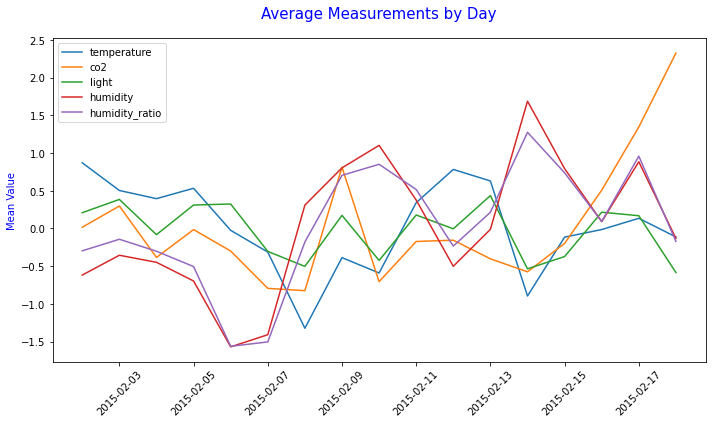

In [203]:
mean_temp_by_day = df_sc.resample('D').mean()['temperature']
mean_co2_by_day = df_sc.resample('D').mean()['co2']
mean_light_by_day = df_sc.resample('D').mean()['light']
mean_humidity_by_day = df_sc.resample('D').mean()['humidity']
mean_humidity_ratio_by_day = df_sc.resample('D').mean()['humidity_ratio']
dates = df_sc.resample('D').mean().index

plt.figure(figsize=(10,6))
plt.plot(dates, mean_temp_by_day, label='temperature')
plt.plot(dates, mean_co2_by_day, label='co2')
plt.plot(dates, mean_light_by_day, label='light')
plt.plot(dates, mean_humidity_by_day, label='humidity')
plt.plot(dates, mean_humidity_ratio_by_day, label='humidity_ratio')
plt.title('Average Measurements by Day', fontsize=15, pad=20, color='blue')
plt.xticks(rotation=45)
plt.ylabel('Mean Value', color='blue')
plt.legend(loc=0)
plt.tight_layout()
plt.savefig('../images/fig16.jpg', dpi=200)
plt.show()

### Average measurements by Day.

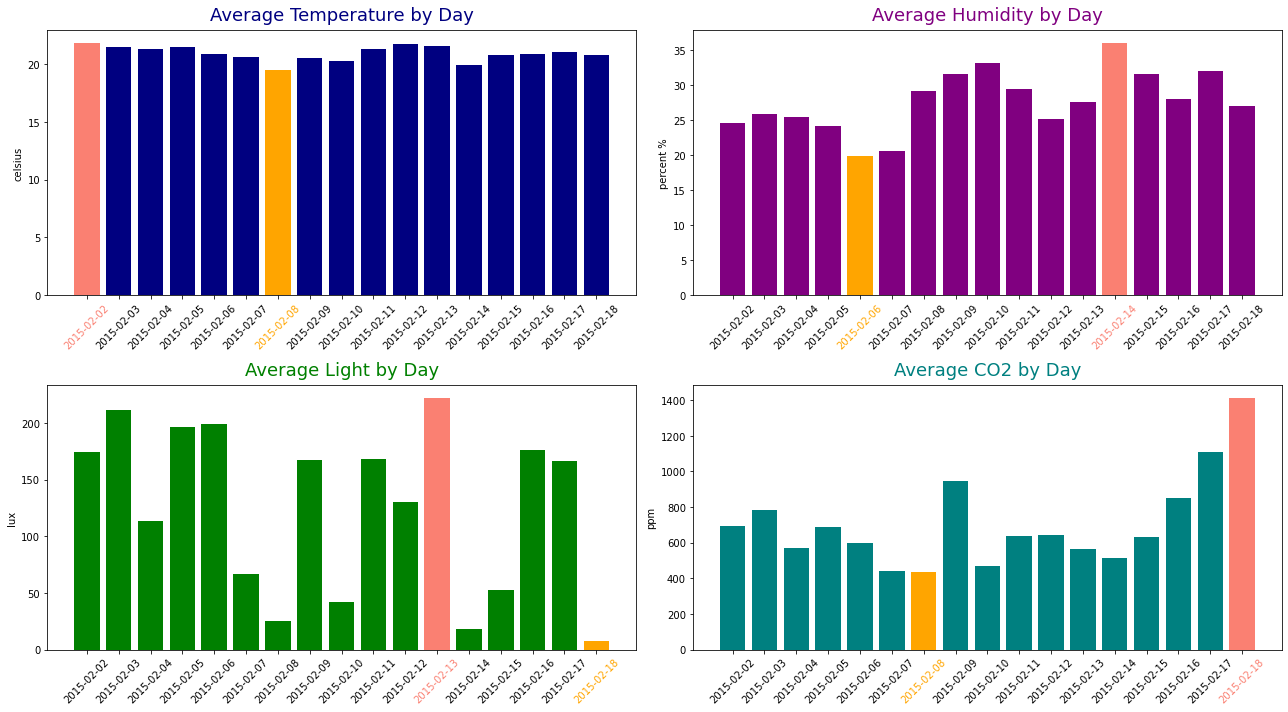

In [301]:
xaxes = ['temperature', 'humidity', 'light', 'co2']
yaxes = ['celsius', 'percent %', 'lux', 'ppm']
titles = ['Temperature', 'Humidity', 'Light', 'CO2']
colors = ['navy', 'purple', 'green', 'teal']
dates = df.resample('D').mean().index

f, a = plt.subplots(2,2)
a = a.ravel()
f.set_figheight(10)
f.set_figwidth(18)

for idx, ax in enumerate(a):
    ax.xaxis.set_visible(True)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    #ax.plot(dates, df.resample('D').mean()[xaxes[idx]], '*', color=colors[idx])
    values = df.resample('D').mean()[xaxes[idx]].values
    clrs = ['salmon' if (x == max(values)) else colors[idx] for x in values]
    max_id = clrs.index('salmon')
    clrs = ['orange' if (x == min(values)) else colors[idx] for x in values]
    clrs[max_id] = 'salmon'
    min_id = clrs.index('orange')
    ax.bar(dates, df.resample('D').mean()[xaxes[idx]], color=clrs)
    ax.set_title('Average '+titles[idx]+' by Day', fontsize=18, color=colors[idx], pad=10)
    ax.set_xticks(dates)
    ax.get_xticklabels()[max_id].set_color('salmon')
    ax.get_xticklabels()[min_id].set_color('orange')
    ax.set_ylabel(yaxes[idx])
    
plt.tight_layout()
f.savefig('../images/fig25.jpg')
plt.show()
# the plot will not look good with the "dark" theme; switch to light, to view

*Average measurements by day. Maximum values are highlighted in the salmon-like color. Minimum values are highlighted in the orange color.
Looking at the average values, we can identify days that may be of interest. For example, average co2 is significantly higher on 2/18. Average light is lowest on 2/18.*

### Which day has the highest number of observations marked "occupied"?

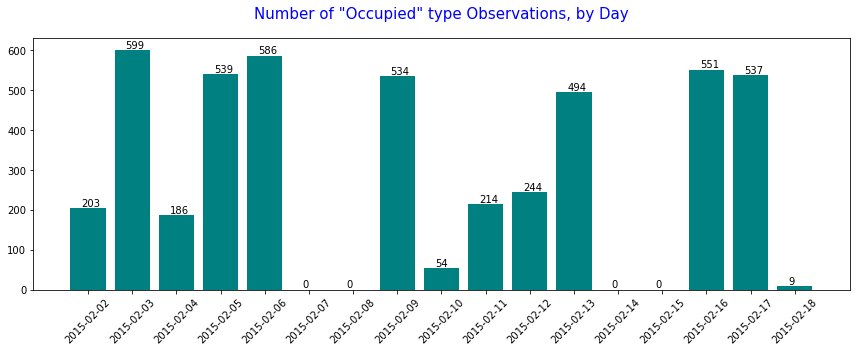

In [205]:
occupancy_by_day = df['occupancy'].resample('D').sum()
dates = df['occupancy'].resample('D').sum().index

plt.figure(figsize=(12,5))
bars = plt.bar(dates, occupancy_by_day, color='teal')

plt.title('Number of "Occupied" type Observations, by Day', fontsize=15, pad=20, color='blue')
plt.xticks(dates, rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+.25, yval+5, yval)
    
plt.tight_layout()
plt.savefig('../images/fig17.jpg', dpi=200)
plt.show()

2015-02-06 has the highest number of observations marked "occupied".  
2015-02-07 and 2015-02-08 are weekend days (Sat/Sun), hence occupancy count 0 makes sense.  
2015-02-14 and 2015-02-15 are also weekend days, occupancy count 0.  

*We can tell from this bar plot the room is not occupied on Saturdays and Sundays. There is a very small number of observations on the last day, 2/18.*  
- 1440 2015-02-03 00:00:00 to 2015-02-03 23:59:00 - day with all data  
- 581 2015-02-02 14:19:00 to 2015-02-02 23:59:00 - they did not record until later that afternoon, so we are missing the morning and early afternoon data  
- 1013 2015-02-04 00:00:00 to 2015-02-04 23:59:00 - need to investigate further. 
- 574 2015-02-10 00:00:00 to 2015-02-10 09:33:00 - recording was stopped before start of business day, and we only have values for nighttime  
- 552 2015-02-11 14:48:00 to 2015-02-11 23:59:00 - they did not record until later that afternoon, so we are missing the morning and early afternoon data
- 560 2015-02-18 00:00:00 to 2015-02-18 09:19:00 - they came in before start of business day, which seems to be after 9:30 am, and stopped the recording  

### Are we observing the same number of recorded observations for each day?

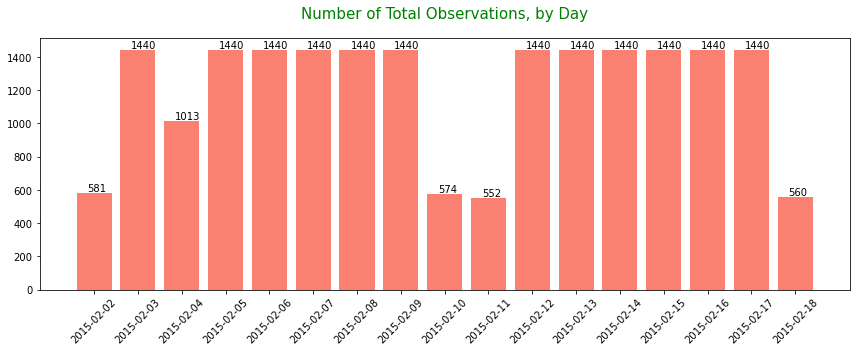

In [206]:
observations_by_day = df['occupancy'].resample('D').count()
dates = df['occupancy'].resample('D').sum().index

plt.figure(figsize=(12,5))
bars = plt.bar(dates, observations_by_day, color='salmon')

plt.title('Number of Total Observations, by Day', fontsize=15, pad=20, color='green')
plt.xticks(dates, rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+.25, yval+10, yval)

plt.tight_layout()
plt.savefig('../images/fig18.jpg', dpi=200)
plt.show()

*4, 10, 11, and 18 are days with significantly less number of observations.*

*Most days have 1,440 observations recorded, however there are a few days with a significantly lower number of records. This may indicate missing data. So, when looking at these days closer, I found that the recordings either start later, i.e. late afternoon instead of at midnight, or they cut off before midnight. This is why we see lower number of observations for some of the days. However, there isn’t enough information to determine why the values were not recorded all day and night for these dates. Not having all of the values did not have any negative effect on the modeling phase.*

In [317]:
days = ['03', '02', '04', '10', '11', '18']
for day in days:
    index = '2015-02-'+day
    print (df[index]['light'].count(), str(df['2015-02-'+day].index[0])+' to '+str(df['2015-02-'+day].index[-1]))

1440 2015-02-03 00:00:00 to 2015-02-03 23:59:00
581 2015-02-02 14:19:00 to 2015-02-02 23:59:00
1013 2015-02-04 00:00:00 to 2015-02-04 23:59:00
574 2015-02-10 00:00:00 to 2015-02-10 09:33:00
552 2015-02-11 14:48:00 to 2015-02-11 23:59:00
560 2015-02-18 00:00:00 to 2015-02-18 09:19:00


### Scale data and plot the rolling (60) mean for each day, then compare attribute mean over time.
##### I chose 60 because observations are recorded every minute, so a rolling 60 would give us the mean for the previous hour.
##### Again, humidity and humidity_ratio are moving together.

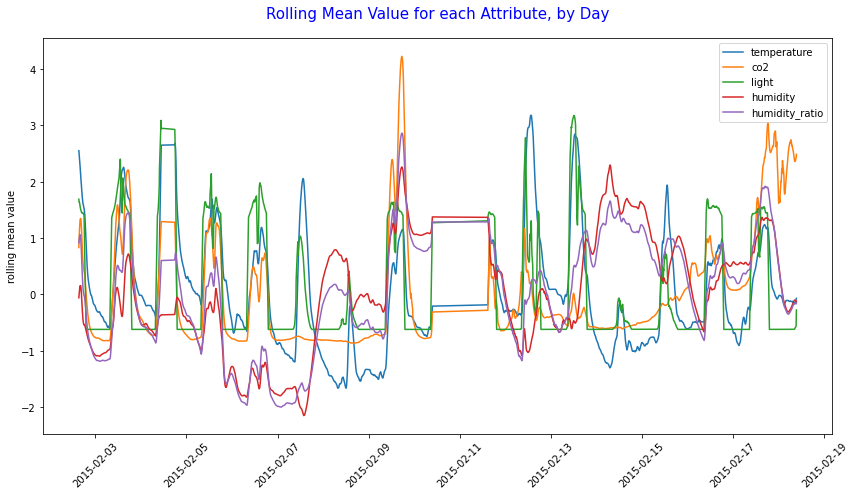

In [207]:
temp_roll_mean = df_sc.rolling(60).mean()['temperature']
co2_roll_mean = df_sc.rolling(60).mean()['co2']
light_roll_mean = df_sc.rolling(60).mean()['light']
humidity_roll_mean = df_sc.rolling(60).mean()['humidity']
humidity_ratio = df_sc.rolling(60).mean()['humidity_ratio']
dates = df_sc.index

plt.figure(figsize=(12,7))
plt.plot(dates, temp_roll_mean, label='temperature')
plt.plot(dates, co2_roll_mean, label='co2')
plt.plot(dates, light_roll_mean, label='light')
plt.plot(dates, humidity_roll_mean, label='humidity')
plt.plot(dates, humidity_ratio, label='humidity_ratio')
plt.title('Rolling Mean Value for each Attribute, by Day', fontsize=15, pad=20, color='blue')
plt.xticks(rotation=45)
plt.ylabel('rolling mean value')
plt.legend(loc=0)
plt.tight_layout()
plt.savefig('../images/fig19.jpg', dpi=200)
plt.show()

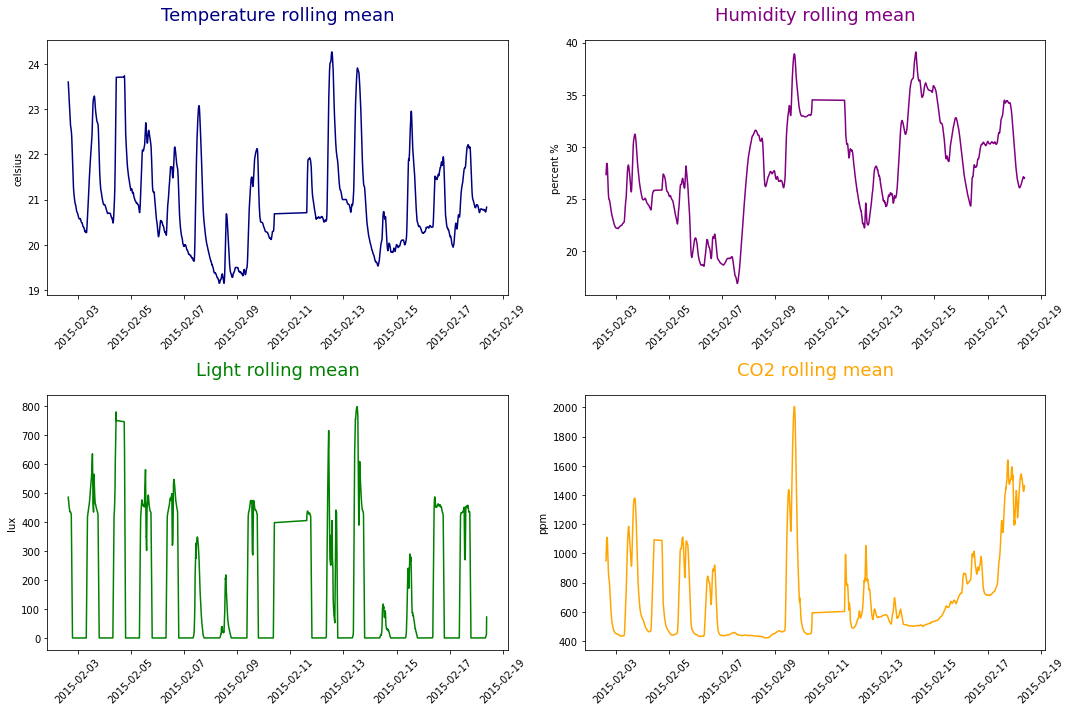

In [208]:
xaxes = ['temperature', 'humidity', 'light', 'co2']
yaxes = ['celsius', 'percent %', 'lux', 'ppm']
titles = ['Temperature', 'Humidity', 'Light', 'CO2']
colors = ['navy', 'purple', 'green', 'orange']
dates = df.index

f, a = plt.subplots(2,2)
a = a.ravel()
f.set_figheight(10)
f.set_figwidth(15)

for idx, ax in enumerate(a):
    ax.xaxis.set_visible(True)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.plot(dates, df.rolling(60).mean()[xaxes[idx]], color=colors[idx])
    ax.set_title(titles[idx]+' rolling mean', fontsize=18, color=colors[idx], pad=20)
    #ax.set_xticks(dates)
    ax.set_ylabel(yaxes[idx])
    
plt.tight_layout()
f.savefig('../images/fig24.jpg')
plt.show()

*With the rolling mean, we eliminate some of the spikes in the data, and can get a smoother view of how the variables change over time. Observations:
Temperature lower on the weekends.
Humidity lower on the weekends.
Light high during the day, 0 at night. Lower on the weekends.
CO2 lower on the weekends. Very high values on the 9th or 10th.
The status of the day, i.e. weekend or weekday seems to be correlated with all these variables. We also know occupancy is correlated to the status of the day, as the room is usually empty on the weekends and occupied during the week. This information will be helpful during the modeling phase.*

### Do we observe any significant correlation between attributes/features and the occupancy class?
##### There is a high positive correlation between occupancy and temperature, light, co2.
##### This information will be useful later, in modeling, when choosing best features to predict occupancy.

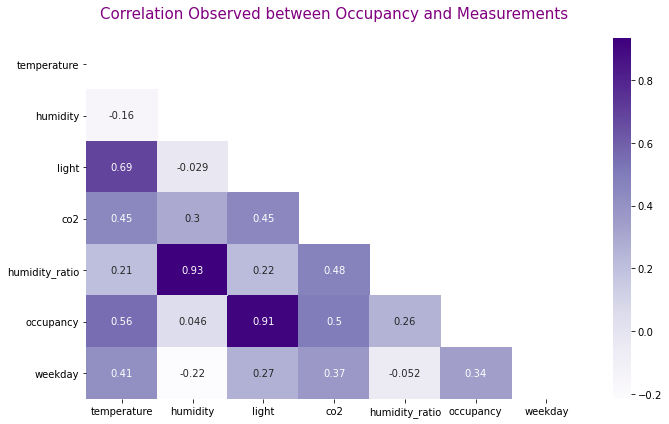

In [209]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,6))
sns.heatmap(corr, mask=mask, annot=True, cmap='Purples')
plt.title('Correlation Observed between Occupancy and Measurements', fontsize=15, pad=20, color='purple')
plt.tight_layout()
plt.savefig('../images/fig20.jpg', dpi=200)
plt.show()

*Occupancy is highly correlated to light, temperature, and co2, with light being the highest. These variables are good candidates for feature selection in the modeling phase of the project.
Humidity and humidity_ratio are highly correlated because humidity_ratio is calculated from humidity and temperature.
There is a high correlation between temperature and light.*